#### Import librairies

In [1]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import tensorflow as tf
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np 

In [2]:
data = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv", encoding="ISO-8859-1")
print(data.shape)
print("-"*20)
display(data.info())
print("-"*20)
display(data.head())
print("-"*20)
print(data.v1.value_counts())
print("-"*20)
data.describe()

(5572, 5)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

--------------------


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


--------------------
ham     4825
spam     747
Name: v1, dtype: int64
--------------------


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [3]:
for i in range(3):
  col = "Unnamed: " + str(i+2)
  print("Number of no missing rows for ", col, " ==> ", data[col].notnull().sum())

Number of no missing rows for  Unnamed: 2  ==>  50
Number of no missing rows for  Unnamed: 3  ==>  12
Number of no missing rows for  Unnamed: 4  ==>  6


In [4]:
data["mail_text"] = data["v2"] 
data = data.loc[:,["v1","mail_text"]]

data.head()

,v1,mail_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


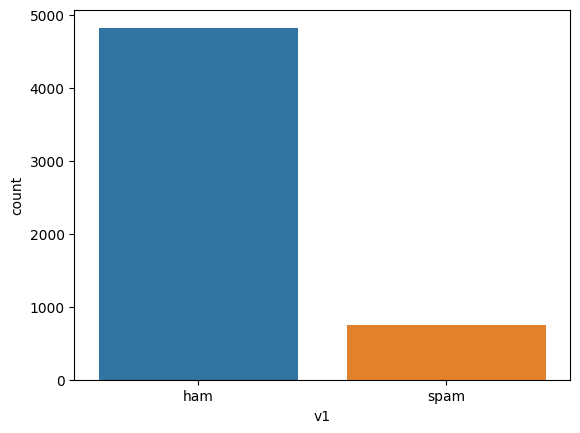

In [5]:
sns.countplot(x="v1", data=data)
plt.show()

In [6]:
data["label"] = data["v1"].map({"ham" : 0, "spam" : 1})
data.head()

,v1,mail_text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Preprocessing

In [7]:
!python -m spacy download en_core_web_sm -q

2023-05-13 11:02:25.446977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
for token in nlp("it is just a longer text and other texts"):
  print(token.lemma_)

it
be
just
a
long
text
and
other
text


In [10]:
data["mail_text_cleaned"] = data["mail_text"].apply(lambda x: "".join(ch for ch in x if (ch.isalnum() or ch==" ")))\
                                             .apply(lambda x: x.lower().replace(" +","").strip())\
                                             .apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))
data.head()

,v1,mail_text,label,mail_text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think usf live


In [11]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000) 

tokenizer.fit_on_texts(data.mail_text_cleaned) 

data["mail_text_sequences"] = tokenizer.texts_to_sequences(data.mail_text_cleaned)

data["len_text"] = data["mail_text_sequences"].apply(lambda x: len(x))
data = data[data["len_text"]!=0]
data.head()

,v1,mail_text,label,mail_text_cleaned,mail_text_sequences,len_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...,"[3601, 229, 446, 462, 941, 35, 51, 203, 942, 7...",14
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni,"[9, 194, 463, 288, 1, 1452]",6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...,"[12, 298, 3, 532, 663, 33, 1453, 850, 422, 145...",22
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c,"[1, 124, 149, 2353, 1, 84]",6
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think usf live,"[708, 22, 664, 128]",4


In [12]:
mail_pad = tf.keras.preprocessing.sequence.pad_sequences(data["mail_text_sequences"], padding="post")

In [13]:
full_ds = tf.data.Dataset.from_tensor_slices((mail_pad, data["label"]))

In [14]:
# Train Test Split
TAKE_SIZE = int(0.7*data.shape[0])

train_data = full_ds.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(64)

test_data = full_ds.skip(TAKE_SIZE)
test_data = test_data.batch(64)

In [15]:
# Finding Total no of unique words in corpus
s = set()
for sent in data['mail_text_cleaned']:
  for word in sent.split():
	  s.add(word)
vocab_size=len(s)
print(vocab_size)

8161


In [16]:
vocab_size = len(tokenizer.word_counts)
vocab_size

8201

## Training

### LSTM

In [17]:
model_lstm = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(input_dim=5000+1, output_dim=16, name="embedding") ,
  tf.keras.layers.LSTM(units=64, return_sequences=True), 
  tf.keras.layers.LSTM(units=32, return_sequences=False), 
  tf.keras.layers.Dense(16, activation='relu'), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [18]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [19]:
model_lstm.compile(optimizer=adam,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80016     
                                                                 
 lstm (LSTM)                 (None, None, 64)          20736     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 113,713
Trainable params: 113,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# weights = 1/(data["label"]).value_counts()
# weights = weights * len(data)/5
# weights = {index : values for index , values in zip(weights.index,weights.values)}
# weights

{0: 0.23116123642439432, 1: 1.4836461126005362}

In [20]:
model_lstm.fit(train_data, validation_data=test_data, epochs=15)

Epoch 1/15
61/61 [==============================] - 14s 135ms/step - loss: 0.6423 - binary_accuracy: 0.8660 - val_loss: 0.5460 - val_binary_accuracy: 0.8633
Epoch 2/15
61/61 [==============================] - 9s 141ms/step - loss: 0.4148 - binary_accuracy: 0.8660 - val_loss: 0.3933 - val_binary_accuracy: 0.8633
Epoch 3/15
61/61 [==============================] - 8s 132ms/step - loss: 0.3858 - binary_accuracy: 0.8660 - val_loss: 0.3873 - val_binary_accuracy: 0.8633
Epoch 4/15
61/61 [==============================] - 7s 121ms/step - loss: 0.3723 - binary_accuracy: 0.8660 - val_loss: 0.3631 - val_binary_accuracy: 0.8633
Epoch 5/15
61/61 [==============================] - 9s 141ms/step - loss: 0.2936 - binary_accuracy: 0.8660 - val_loss: 0.1929 - val_binary_accuracy: 0.8633
Epoch 6/15
61/61 [==============================] - 8s 127ms/step - loss: 0.1342 - binary_accuracy: 0.9641 - val_loss: 0.1233 - val_binary_accuracy: 0.9795
Epoch 7/15
61/61 [==============================] - 9s 142ms/st

In [21]:
# Plot the loss evolution for the train and validation set

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=model_lstm.history.history["loss"],
                    mode='lines',
                    name='loss'))
fig.add_trace(go.Scatter(y=model_lstm.history.history["val_loss"],
                    mode='lines',
                    name='val_loss'))
fig.show()

In [22]:
# Plot the accuracy evolution for the train and validation set

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=model_lstm.history.history["binary_accuracy"],
                    mode='lines',
                    name='accuracy'))
fig.add_trace(go.Scatter(y=model_lstm.history.history["val_binary_accuracy"],
                    mode='lines',
                    name='val_accuracy'))
fig.show()